<a href="https://colab.research.google.com/github/MerkulovDaniil/optim/blob/master/assets/Notebooks/Newton_Quasi_Newton_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Damped Newton

In this task you will neeed to implement Damped Newton method and compare them on the proposed problem.

Please, comment on the results.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Number of iterations: 500
Number of iterations: 61
Number of iterations: 20


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Number of iterations: 500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: UserWarning: The following kwargs were not used by contour: 'label'


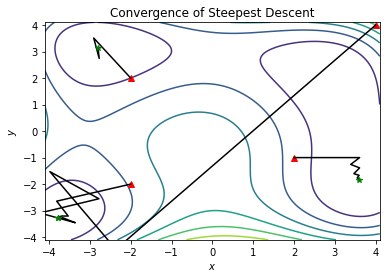

Number of iterations: 8
Number of iterations: 12
Number of iterations: 9
Number of iterations: 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: UserWarning: The following kwargs were not used by contour: 'label'


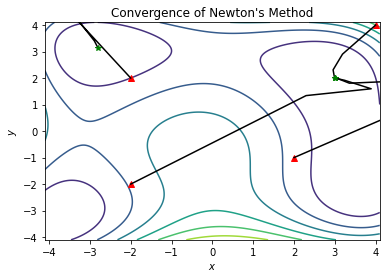

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: UserWarning: The following kwargs were not used by contour: 'label'


Number of iterations: 63
Number of iterations: 65
Number of iterations: 64
Number of iterations: 64


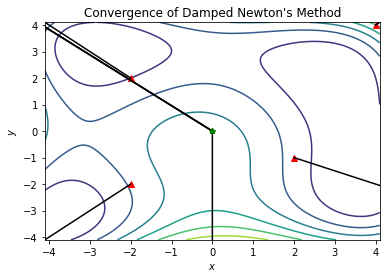

In [ ]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo
import numpy.linalg as la

def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
    
def grad_f(x):
    return np.array([2*(2*x[0]*(x[0]**2+x[1]-11)+x[0]+x[1]**2-7),2*(x[0]**2+2*x[1]*(x[0]+x[1]**2-7)+x[1]-11)])
    	
def Hess_f(x):
    return np.array([[-42 + 12*x[0]**2 + 4*x[1], 4*(x[0] + x[1])],[4*(x[0] + x[1]),-26 + 4*x[0] + 12*x[1]**2]])

def steep(x):
    s = -1*grad_f(x)
    return getAlpha(f,grad_f,x,s)*s

def newton(x):
    return la.solve(Hess_f(x),-grad_f(x))

def dampNewton(x):
    ###
    ### YOUR CODE
    ###
    return x
    
def getAlpha(f,grad_f,x,s):
    alpha = spo.line_search(f,grad_f,x,s)[0]
    if alpha is None:
        alpha = 1
    return alpha

def get_iterates(method,starter,maxit=500,tol=1e-16):
    x = np.array(starter)
    iterates = x
    dx = method(x)
    while la.norm(dx)/la.norm(x) >= tol:
        x = x + dx
        iterates = np.row_stack((iterates,x))
        dx = method(x)
        if len(iterates) == maxit:
            break
    print(f"Number of iterations: {len(iterates)}")
    return np.transpose(iterates), x
    
starters = [[4, 4],[2,-1],[-2,2],[-2,-2]]
plot_bound = 4.1
methods, methodnames = [steep,newton,dampNewton],["Steepest Descent","Newton's Method","Damped Newton's Method"]
    
for method in methods:
    for starter in starters:
        iterates, final = get_iterates(method,starter)
        plt.plot(starter[0],starter[1],'r^',label='start point')
        plt.plot(iterates[0],iterates[1],'k-',label='path taken')
        plt.plot(final[0],final[1],'g*',label='terminal point')
        # plt.legend()

    xmesh, ymesh = np.meshgrid(np.linspace(-plot_bound,plot_bound,801),np.linspace(-plot_bound,plot_bound,801))
    fmesh = f((xmesh, ymesh))
    plt.axis([-plot_bound,plot_bound,-plot_bound,plot_bound])
    plt.title(f"Convergence of {methodnames[methods.index(method)]}")
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.contour(xmesh, ymesh, fmesh,label='f(x)')
    fig = plt.gcf()
    plt.savefig('p3afig'+str(methods.index(method)+1)+'.png',dpi=200)
    plt.show()

# Newton vs Quasi-Newton vs GD

---
YOUR TASKS HERE WILL BE:
1. WRITE THE CODE FOR MATRIX GENERATION
2. ADD THE CLASSICAL NEWTON METHOD FOR THE COMPARISON
3. ADD THE DAMPED NEWTON METHOD WITH ANY BUILT-IN LINE SEARCH FOR THE COMPARISON
---

Please, write code to generate ill-conditioned matrix $A$ with condition number $\kappa(A) = \dfrac{\sigma_{max}}{\sigma_{min}}$ at least $40$.

In [ ]:
###
### Your code
###
eig_vals = np.linalg.eigvals(A)
print("Condition number = {}".format(np.max(eig_vals) / np.min(eig_vals)))

Condition number = 49.99999999999879


In [ ]:
f = lambda x: 0.5 * x.T.dot(A.dot(x)) - b.dot(x)
gradf = lambda x: A.dot(x) - b
x0 = np.random.randn(n)

In [ ]:
method = {
    "BB 1": methods.fo.BarzilaiBorweinMethod(f, gradf, init_alpha=1e-4, type=1),
    "BB 2": methods.fo.BarzilaiBorweinMethod(f, gradf, init_alpha=1e-4, type=2),
    "BFGS": methods.fo.BFGS(f, gradf),
    "DFP": methods.fo.DFP(f, gradf),
    "GD": methods.fo.GradientDescent(f, gradf, ss.ExactLineSearch4Quad(A, b)),
    "LBFGS": methods.fo.LBFGS(f, gradf, hist_size=10),
}

In [ ]:
for m in method:
    print("\t Method {}".format(m))
    _ = method[m].solve(x0=x0, tol=tol, max_iter=max_iter, disp=True)

print("\t Method BFGS Scipy")

scopt_conv = []
scopt_res = scopt.minimize(f, x0, method="BFGS", jac=gradf, callback=lambda x: scopt_conv.append(x), 
                           tol=tol, options={"maxiter": max_iter})
print("Result: {}".format(scopt_res.message))
if scopt_res.success:
    print("Convergence in {} iterations".format(scopt_res.nit))
print("Function value = {}".format(f(scopt_res.x)))

print("\t Method L-BFGS Scipy")

scopt_lbfgs_conv = []
scopt_res = scopt.minimize(f, x0, method="L-BFGS-B", jac=gradf, tol=tol, 
                           options={"maxiter": max_iter, 'maxcor': 10, "ftol": 1e-10, "gtol": 1e-6},
                           callback=lambda x: scopt_lbfgs_conv.append(x),
                           )
print("Result: {}".format(scopt_res.message))
if scopt_res.success:
    print("Convergence in {} iterations".format(scopt_res.nit))
print("Function value = {}".format(f(scopt_res.x)))

	 Method BB 1
Required tolerance achieved!
Convergence in 61 iterations
Function value = -2.295939525010034
Norm of gradient = 9.894730436306648e-06
	 Method BB 2
Required tolerance achieved!
Convergence in 61 iterations
Function value = -2.2959395250499366
Norm of gradient = 6.080438850772609e-06
	 Method BFGS
Required tolerance achieved!
Convergence in 46 iterations
Function value = -2.295939525053618
Norm of gradient = 9.37591825251349e-06
	 Method DFP
Required tolerance achieved!
Convergence in 94 iterations
Function value = -2.2959395250538384
Norm of gradient = 6.7342344771832965e-06
	 Method GD
Maximum iteration exceeds!
Convergence in 100 iterations
Function value = -2.295937456619326
Norm of gradient = 0.0028971279348261876
	 Method LBFGS
Required tolerance achieved!
Convergence in 44 iterations
Function value = -2.2959395250334835
Norm of gradient = 9.89422958724675e-06
	 Method BFGS Scipy
Result: Optimization terminated successfully.
Convergence in 59 iterations
Function val

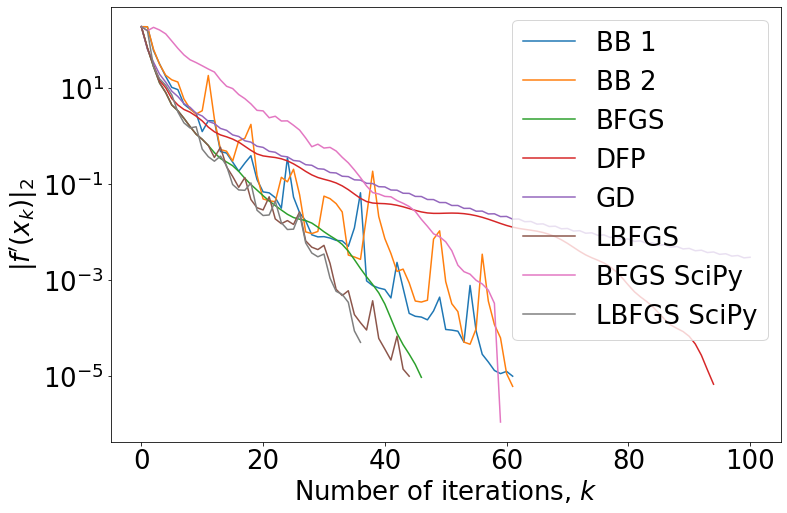

In [ ]:
plt.figure(figsize=(12, 8))
fontsize = 26
for m in method:   
    plt.semilogy([np.linalg.norm(gradf(x)) for x in method[m].get_convergence()], label=m)

plt.semilogy([np.linalg.norm(gradf(x)) for x in [x0] + scopt_conv], label='BFGS SciPy')

plt.semilogy([np.linalg.norm(gradf(x)) for x in [x0] + scopt_lbfgs_conv], label='LBFGS SciPy')
plt.legend(fontsize=fontsize)
plt.ylabel("$\|f'(x_k)\|_2$", fontsize=fontsize)
plt.xlabel("Number of iterations, $k$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

In [ ]:
for m in method:
    print("\t Method {}".format(m))
    %timeit method[m].solve(x0=x0, tol=tol, max_iter=max_iter)

%timeit scopt.minimize(f, x0, method="BFGS", jac=gradf, tol=tol, options={"maxiter": max_iter})
%timeit scopt.minimize(f, x0, method="L-BFGS-B", jac=gradf, tol=tol, options={"maxiter": max_iter, 'maxcor': 10, "ftol": 1e-10, "gtol": 1e-6})

	 Method BB 1
The slowest run took 6.49 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 1.17 ms per loop
	 Method BB 2
1000 loops, best of 3: 1.16 ms per loop
	 Method BFGS
100 loops, best of 3: 5.09 ms per loop
	 Method DFP
100 loops, best of 3: 8.96 ms per loop
	 Method GD
100 loops, best of 3: 2.12 ms per loop
	 Method LBFGS
100 loops, best of 3: 6.12 ms per loop
100 loops, best of 3: 9.05 ms per loop
1000 loops, best of 3: 1.3 ms per loop
